# Deliverable4 
### Q7 Plot the number of occurrences of the token (the frequency column) of data over the years using matplotlib.

In [5]:
pip install awswrangler

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 402.8/402.8 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 18.6 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [6]:
import awswrangler as wr

### `awswrangler` 
#### is a Python library that simplifies the process of interacting with AWS  and S3. It provides convenient functions for data engineering, ETL (Extract, Transform, Load) operations, and working with AWS data services.

read data from Amazon S3 into a Pandas DataFrame

In [10]:
s3_path = "s3://aws-logs-992382709365-us-east-1/merged.csv"

df = wr.s3.read_csv(s3_path)

In [18]:
# remove the first row from the DataFrame 
df = df[1:]

#### Data dictinary:
- `token`: The word or term being analyzed.
- `year`: The year in which the analysis is conducted.
- `frequency`: The frequency or occurrence of the token in the specified year.
- `pages`: The number of pages containing the token in the specified year.
- `books`: The number of books containing the token in the specified year.

Getting familiar with DataFrame

In [19]:
# First 5 rows
df.head()

,token,year,frequency,pages,books
1,data,1584,16,14,1
2,data,1614,3,2,1
3,data,1627,1,1,1
4,data,1631,22,18,1
5,data,1637,1,1,1


In [13]:
df.shape

(317, 5)

We have 5 columns and 317 rows

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   token      317 non-null    object
 1   year       317 non-null    object
 2   frequency  317 non-null    object
 3   pages      317 non-null    object
 4   books      317 non-null    object
dtypes: object(5)
memory usage: 12.5+ KB


All our columns are object dtype

In [15]:
df.isna().sum()

token        0
year         0
frequency    0
pages        0
books        0
dtype: int64

In [17]:
df.duplicated().sum()

0

No NaN and duplicated values

## Q7 Plot the number of occurrences of the token (the frequency column) of data over the years using matplotlib.

In [22]:
# Aggregating the 'frequency' values based on the 'year' column
df_grouped = df.groupby('year')['frequency'].sum().reset_index()

In [23]:
# Check the result
df_grouped

,year,frequency
0,1584,16
1,1614,3
2,1627,1
3,1631,22
4,1637,1
...,...,...
311,2004,201841
312,2005,197467
313,2006,203669
314,2007,168338


In [ ]:
# Converting 'frequency' and 'year' columns to numeric for plotting
df_grouped['frequency'] = pd.to_numeric(df_grouped['frequency'], errors='coerce')
df_grouped['year'] = pd.to_numeric(df_grouped['year'], errors='coerce')

#### Lets Plot the number of occurrences of the token (the frequency column) of data over the years using 

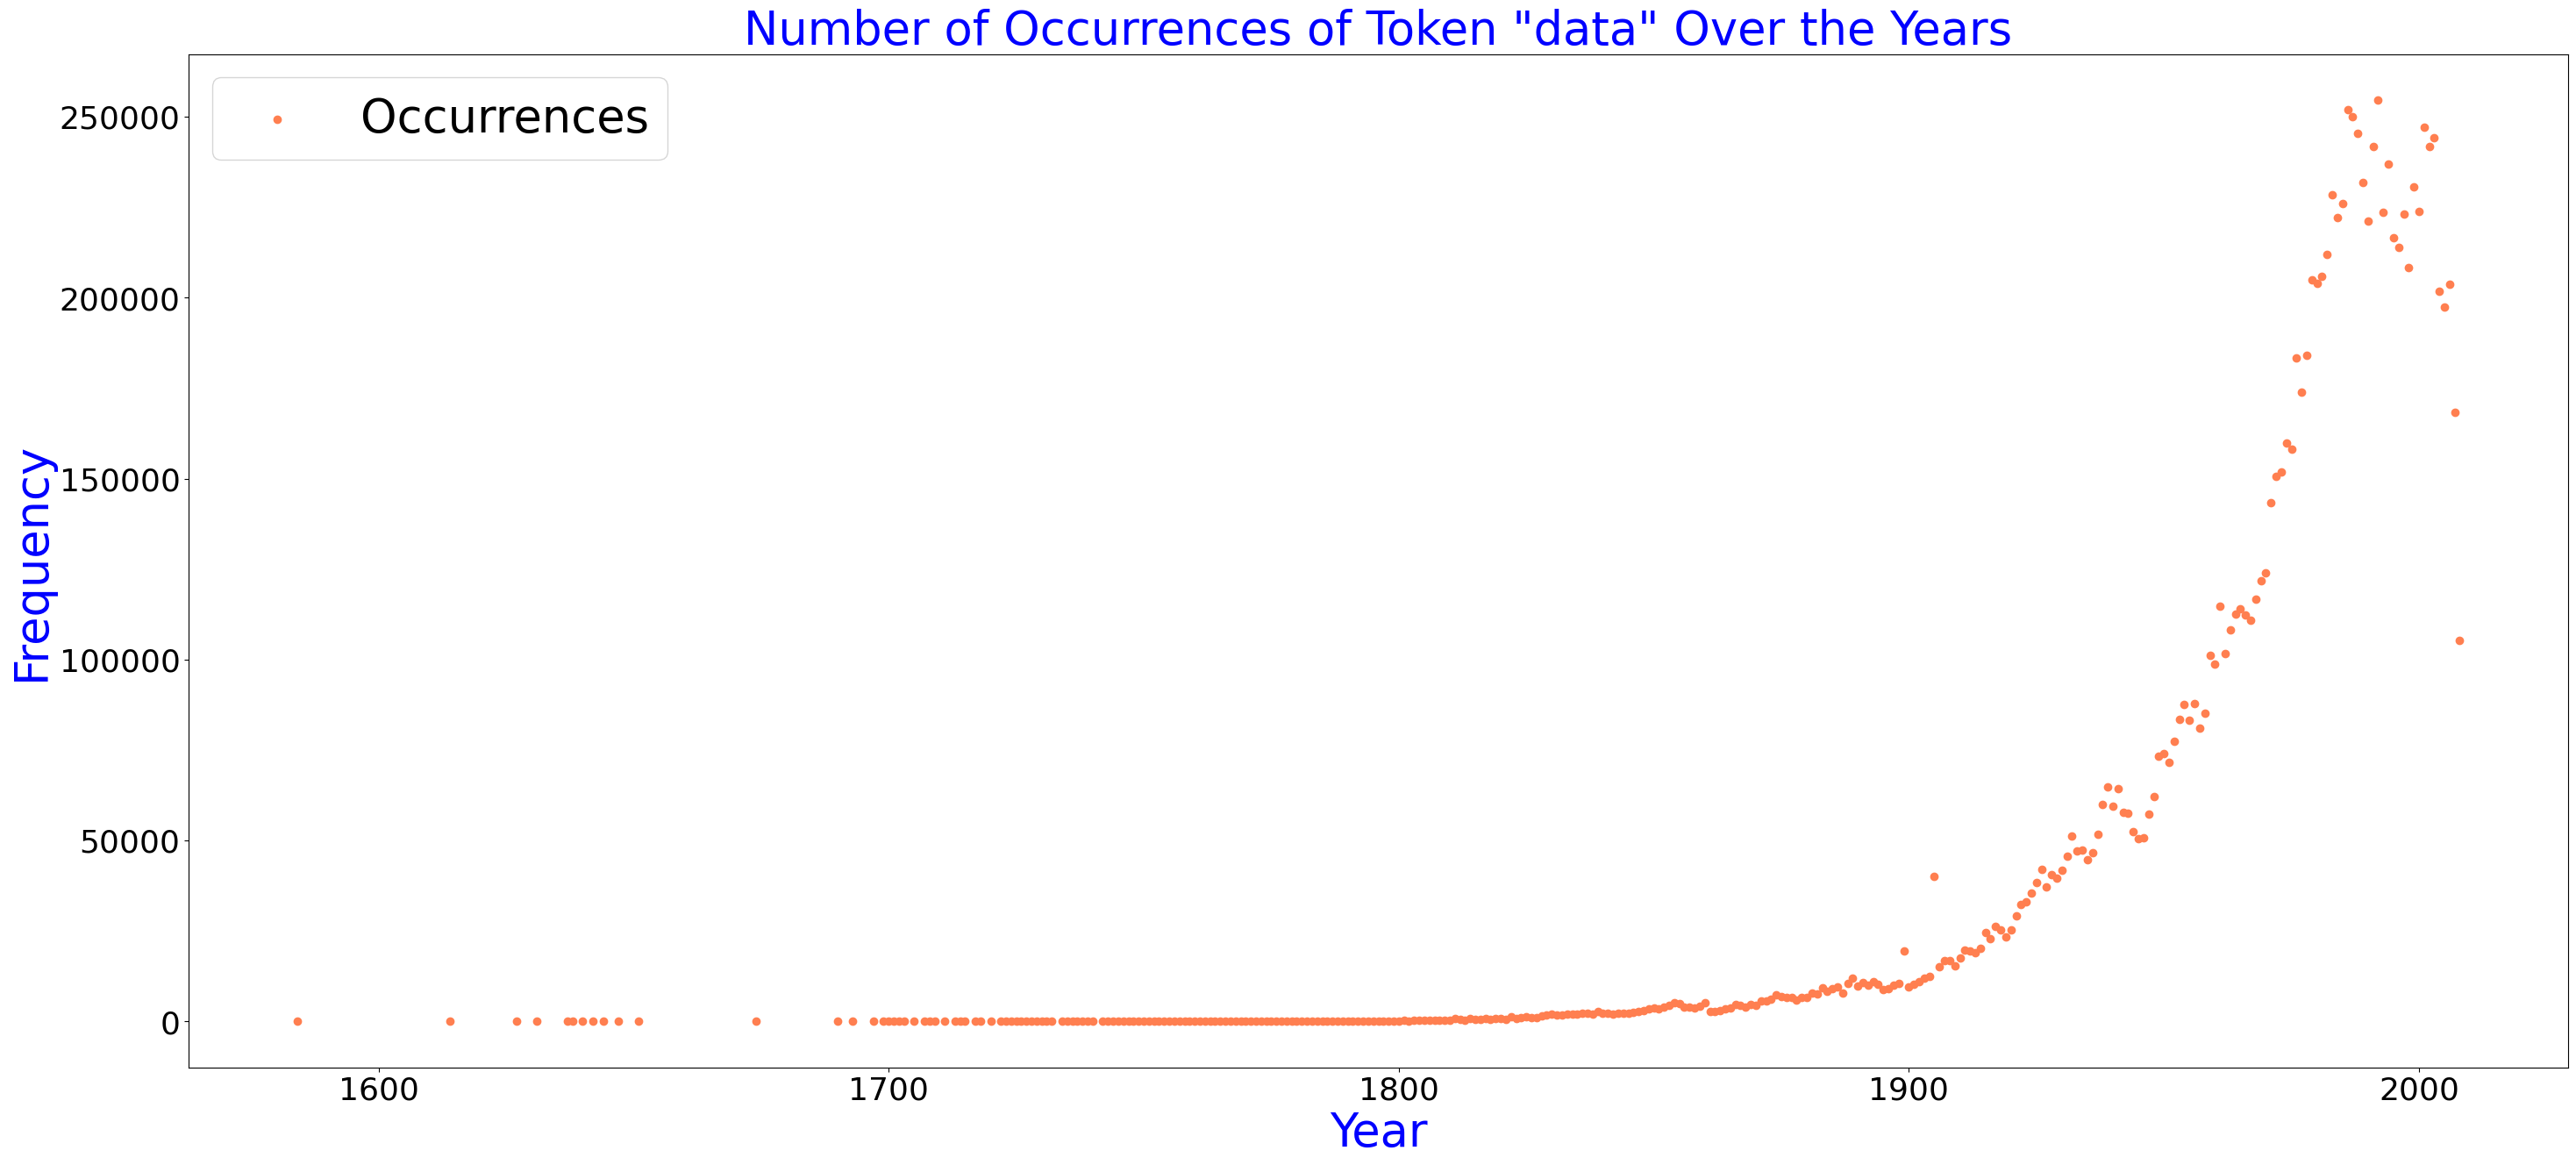

In [85]:
import matplotlib.pyplot as plt

plt.figure(figsize=(35, 15))
plt.scatter(df_grouped['year'], df_grouped['frequency'], color='coral', label='Occurrences')
plt.title('Number of Occurrences of Token "data" Over the Years', fontsize=38, color='blue')
plt.xlabel('Year', fontsize=38, color='blue')
plt.ylabel('Frequency', fontsize=38, color='blue')
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

# Customize legend
legend_label = 'Occurrences'
plt.legend([legend_label], loc='upper left', fontsize=38)

plt.show()


Let's add `min and max` annotations on our visual

In [86]:
# Adding min and max values
min_value = df_grouped['frequency'].min()
max_value = df_grouped['frequency'].max()
min_year = df_grouped.loc[df_grouped['frequency'].idxmin()]['year']
max_year = df_grouped.loc[df_grouped['frequency'].idxmax()]['year']

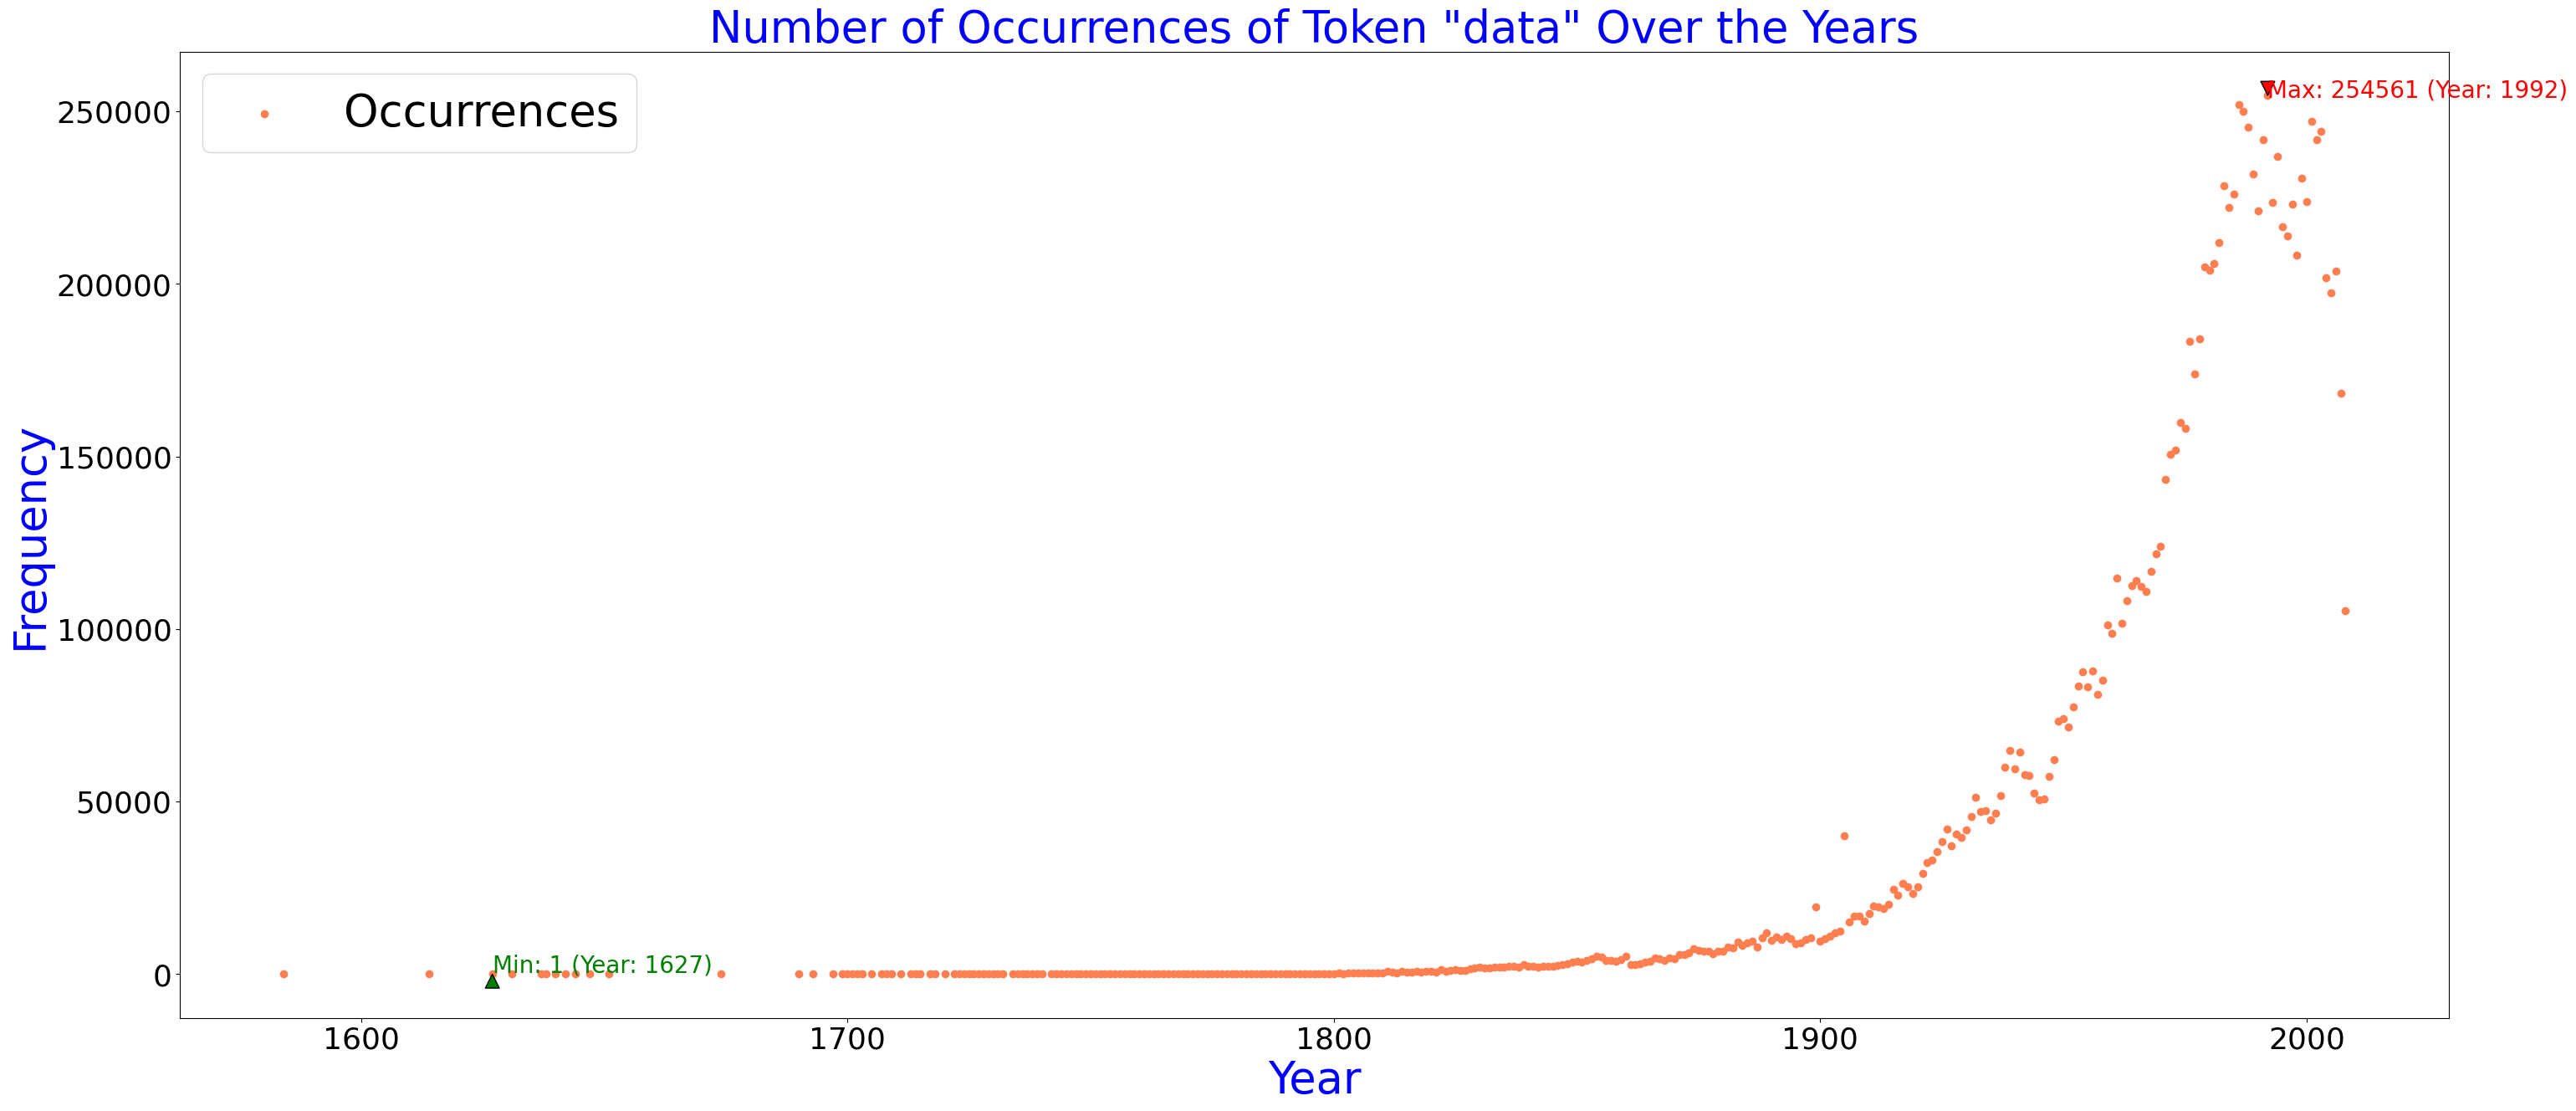

In [87]:
# Updated scatterplot
plt.figure(figsize=(35, 15))
plt.scatter(df_grouped['year'], df_grouped['frequency'], color='coral', label='Occurrences')
plt.title('Number of Occurrences of Token "data" Over the Years', fontsize=38, color='blue')
plt.xlabel('Year', fontsize=38, color='blue')
plt.ylabel('Frequency', fontsize=38, color='blue')
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

# Adding annotations
plt.annotate(f'Min: {min_value} (Year: {min_year})', xy=(min_year, min_value), xytext=(min_year, min_value + 500), 
             fontsize=20, color='green', arrowprops=dict(facecolor='green', shrink=0.05))
plt.annotate(f'Max: {max_value} (Year: {max_year})', xy=(max_year, max_value), xytext=(max_year, max_value - 500), 
             fontsize=20, color='red', arrowprops=dict(facecolor='red', shrink=0.05))

# Customize legend
legend_label = 'Occurrences'
plt.legend([legend_label], loc='upper left', fontsize=38)

plt.show()


#### Conclusion:
###### This visualization can help you observe trends, patterns, or any significant changes in the usage of the term `data` across different years. Here's what we can gain from this plot:
- We can see that term `data` was barely used at begining and started to be used more often after 1700.
- The term "data" began to rise sharply after the 1990s, much like a ramp for skateboarders, and reached its peak in 1992. 
- The term "data science" is believed to have originated in the early 2000s
- Note from Wikipedia `In 1962, John Tukey described a field he called "data analysis", which resembles modern data science. In 1985, in a lecture given to the Chinese Academy of Sciences in Beijing, C. F. Jeff Wu used the term "data science" for the first time as an alternative name for statistics. Later, attendees at a 1992 statistics symposium at the University of Montpellier  II acknowledged the emergence of a new discipline focused on data of various origins and forms, combining established concepts and principles of statistics and data analysis with computing.` And it can give as a bit information on our visual and my observation.

#### Observation:
- I tried couple diffrenet visuals and end up wit `scatter plot`, as it gives us better view on `Number of Occurrences of Token "data" Over the Years`. While visual like `bar` was needed way bigger `plt.figsize` to see some of the values and patterns. 